# <center><b> <em> Data Preprocessing </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [657]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [658]:
# Read the XLSX file
data = pd.read_csv("data/dataset_model_bronze.csv")

In [659]:
data.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72.0,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15.0,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129.0,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6.0,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75.0,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217.0,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457
3,La Passagère,1964-10-28,Drame,62.0,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8.0,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420
4,La Planète des singes,1968-04-26,Drame_Science fiction,110.0,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1.0,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773


In [660]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7114 entries, 0 to 7113
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             7114 non-null   object 
 1   date              7114 non-null   object 
 2   genre             7114 non-null   object 
 3   duree             7098 non-null   float64
 4   realisateur       7113 non-null   object 
 5   distributeur      7114 non-null   object 
 6   acteurs           7020 non-null   object 
 7   nationalites      7110 non-null   object 
 8   langue_d_origine  7114 non-null   object 
 9   type_film         7114 non-null   object 
 10  annee_production  7114 non-null   int64  
 11  nombre_article    7007 non-null   float64
 12  description       6373 non-null   object 
 13  film_id_allocine  7114 non-null   int64  
 14  image             7114 non-null   object 
 15  boxoffice         7114 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory

In [661]:
data.shape

(7114, 16)

## <font color="green"> || - Missing Data </font>

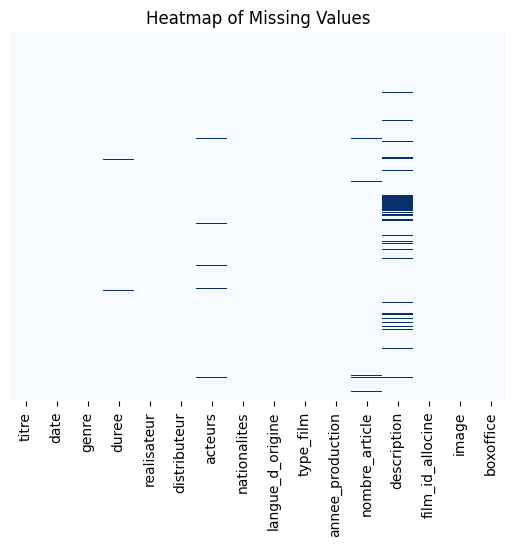

In [662]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [663]:
data.isnull().sum()

titre                 0
date                  0
genre                 0
duree                16
realisateur           1
distributeur          0
acteurs              94
nationalites          4
langue_d_origine      0
type_film             0
annee_production      0
nombre_article      107
description         741
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

In [664]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['acteurs'].isnull()]
lignes_nan.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
1392,"Laban, le petit fantôme",2008-12-03,Animation,52.0,Lasse Persson,Les Films du Préau,NaN,Suède,Suédois,Long-métrage,2006,3.0,Laban vit au château Froussard avec Papa fantô...,139254,https://fr.web.img6.acsta.net/c_310_420/medias...,462
1435,Des idiots et des anges,2009-01-14,Animation,76.0,Bill Plympton,Ed Distribution,NaN,U.S.A.,Anglais,Long-métrage,2009,27.0,Angel est un homme égoïste et sans principes q...,137382,https://fr.web.img6.acsta.net/c_310_420/medias...,6452
2053,En promenade...,2010-09-22,Animation,36.0,Siri Melchior,Les Films du Préau,NaN,Danemark,-,Film à sketches,2010,NaN,Partez à la rencontre d’un petit homme qui déc...,183976,https://fr.web.img4.acsta.net/c_310_420/medias...,5294
2080,Ma petite planète chérie,2010-10-20,Animation,44.0,Jacques-Rémy Girerd,Folimage,NaN,France,Français,Long-métrage,2010,5.0,Neuf histoires qui abordent l’écologie de mani...,57186,https://fr.web.img3.acsta.net/c_310_420/medias...,8784
2095,Les Contes de la ferme,2010-11-10,Animation,38.0,Hermina Tyrlova,KMBO,NaN,République tchèque,-,Film à sketches,2010,NaN,Un programme de cinq courts métrages d'animati...,185089,https://fr.web.img4.acsta.net/c_310_420/medias...,2745


In [665]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['acteurs'])

In [666]:
# Supprimer les lignes contenant des NaN dans la colonne 'acteurs'
data = data.dropna(subset=['realisateur'])

In [667]:
data = data.dropna(subset=['langue_d_origine'])

In [668]:
data.shape

(7019, 16)

In [669]:
data.columns

Index(['titre', 'date', 'genre', 'duree', 'realisateur', 'distributeur',
       'acteurs', 'nationalites', 'langue_d_origine', 'type_film',
       'annee_production', 'nombre_article', 'description', 'film_id_allocine',
       'image', 'boxoffice'],
      dtype='object')

In [670]:
# Afficher les lignes contenant des NaN dans le DataFrame
lignes_nan = data[data['duree'].isnull()]
lignes_nan.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
583,Si seulement...,2004-11-24,Comédie dramatique_Fantastique_Romance,NaN,Gil Junger,SND,"Jennifer Love Hewitt,Paul Nicholls,Lucy Davenport",U.S.A.,Anglais,Long-métrage,2004,13.0,Et si le destin lui offrait une seconde chance...,47219,https://fr.web.img4.acsta.net/c_310_420/medias...,30159
1525,Le Monde merveilleux d'Impy,2009-04-08,Animation_Famille,NaN,Reinhard Klooss,Océan Films,"Hannes Maurer,Wigald Boning,Anke Engelke",Allemagne,Allemand,Long-métrage,2008,8.0,"Pour son anniversaire, Impy le dinosaure reçoi...",134513,https://fr.web.img4.acsta.net/c_310_420/medias...,32010
2457,Chiens de paille,2011-11-09,Thriller,NaN,Rod Lurie,-,"James Marsden,Kate Bosworth,Alexander Skarsgård",U.S.A.,Anglais,Long-métrage,2011,66.0,Un Anglais et sa femme quittent le pays pour a...,127658,https://fr.web.img5.acsta.net/c_310_420/medias...,5000000
2922,Beautiful creatures,2013-01-16,Comédie_Drame_Thriller,NaN,Bill Eagles,-,"Rachel Weisz,Susan Lynch (I)",Grande-Bretagne,-,Long-métrage,2000,3.0,NaN,29343,https://fr.web.img3.acsta.net/c_310_420/medias...,3410000
3120,Raanjhanaa,2013-06-21,Romance,NaN,Aanand Rai,Aanna Films,"V Dhanush,Sonam Kapoor,Abhay Deol",Inde,Hindi,Long-métrage,2013,3.0,L'histoire d'amour entre Kundan et Zoya.,221396,https://fr.web.img3.acsta.net/c_310_420/pictur...,414211


In [671]:
# Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
moyenne_colonne = data['duree'].mean()
data['duree'] = data['duree'].fillna(moyenne_colonne)

In [672]:
data.isnull().sum()

titre                 0
date                  0
genre                 0
duree                 0
realisateur           0
distributeur          0
acteurs               0
nationalites          4
langue_d_origine      0
type_film             0
annee_production      0
nombre_article       83
description         730
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [673]:
data.duplicated().sum()

0

In [674]:
data = data.drop_duplicates()

In [675]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 7113
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             7019 non-null   object 
 1   date              7019 non-null   object 
 2   genre             7019 non-null   object 
 3   duree             7019 non-null   float64
 4   realisateur       7019 non-null   object 
 5   distributeur      7019 non-null   object 
 6   acteurs           7019 non-null   object 
 7   nationalites      7015 non-null   object 
 8   langue_d_origine  7019 non-null   object 
 9   type_film         7019 non-null   object 
 10  annee_production  7019 non-null   int64  
 11  nombre_article    6936 non-null   float64
 12  description       6289 non-null   object 
 13  film_id_allocine  7019 non-null   int64  
 14  image             7019 non-null   object 
 15  boxoffice         7019 non-null   int64  
dtypes: float64(2), int64(3), object(11)
memory usag

In [676]:
data.isnull().sum()

titre                 0
date                  0
genre                 0
duree                 0
realisateur           0
distributeur          0
acteurs               0
nationalites          4
langue_d_origine      0
type_film             0
annee_production      0
nombre_article       83
description         730
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

## <font color="green"> IV - Nettoyage Données Quantitatives </font>

In [677]:
def convert_data_types(df):
    # Convertir la colonne 'date' en type datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

#     # Convertir la colonne 'durée' en type float
#     df['durée'] = pd.to_numeric(df['durée'], errors='coerce')
    df['duree'] = df['duree'].astype(int)


#     # Convertir la colonne 'annee_production' en type int
#     df['annee_production'] = df['annee_production'].astype(int)

#     # Convertir les colonnes 'note_presse' et 'note_spectateurs' en type float
#     df['note_presse'] = pd.to_numeric(df['note_presse'].str.replace(',', '.'), errors='coerce')
#     df['note_spectateurs'] = pd.to_numeric(df['note_spectateurs'].str.replace(',', '.'), errors='coerce')

#     # Convertir la colonne 'nombre_article' en type int en gardant seulement le nombre
#     df['nombre_article'] = df['nombre_article'].str.extract('(\d+)').astype(float)
    # Remplacer les NaN par 0 dans la colonne 'nombre_article'
    df['nombre_article'].fillna(0, inplace=True)
    df['nombre_article'] = df['nombre_article'].astype(int)

#     # Enlever le texte dans la colonne 'box_office_total' et convertir en type int
#     df['box_office_total'] = df['box_office_total'].str.replace(' ', '').str.replace('entrées', '')

#     # Convert the 'box_office_total' column to type int using pd.to_numeric with errors='coerce'
#     df['box_office_total'] = pd.to_numeric(df['box_office_total'], errors='coerce').astype('Int64')
    
#     # Convertir la colonne 'boxoffice' en type int
#     df['boxoffice'] = df['boxoffice'].str.replace(' ', '').astype(int)

    return df

In [678]:
data_propre = convert_data_types(data)
data_propre

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457
3,La Passagère,1964-10-28,Drame,62,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420
4,La Planète des singes,1968-04-26,Drame_Science fiction,110,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7109,Les Vengeances de Maître Poutifard,2023-06-28,Comédie_Famille,90,Pierre-François Martin-Laval,UGC Distribution,"Christian Clavier,Isabelle Nanty,Jennie-Anne W...",France,Français,Long-métrage,2023,5,"Instituteur à la retraite, Robert Poutifard n'...",306417,https://fr.web.img3.acsta.net/c_310_420/pictur...,180735
7110,"Chonchon, le plus mignon des cochons",2023-06-28,Animation_Aventure_Famille,70,Mascha Halberstad,The Jokers / Les Bookmakers,"Hiba Ghafry,Matsen Montsma,Kees Prins",Pays-Bas,Néerlandais,Long-métrage,2022,2,"Lorsque Babs, 9 ans, reçoit de son grand-père ...",299549,https://fr.web.img3.acsta.net/c_310_420/pictur...,6286
7111,Vers un avenir radieux,2023-06-28,Comédie dramatique_Comédie_Drame,95,Nanni Moretti,Le Pacte,"Nanni Moretti,Margherita Buy,Silvio Orlando",Italie,Italien,Long-métrage,2023,26,"Giovanni, cinéaste italien renommé, s’apprête ...",304632,https://fr.web.img6.acsta.net/c_310_420/pictur...,91786
7112,Farang,2023-06-28,Action,99,Xavier Gens,StudioCanal,"Nassim Lyes,Loryn Nounay,Olivier Gourmet",France,Français,Long-métrage,2023,16,Sam est un détenu exemplaire. A quelques mois ...,308295,https://fr.web.img2.acsta.net/c_310_420/pictur...,79426


In [679]:
data_propre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7019 entries, 0 to 7113
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   titre             7019 non-null   object        
 1   date              7019 non-null   datetime64[ns]
 2   genre             7019 non-null   object        
 3   duree             7019 non-null   int64         
 4   realisateur       7019 non-null   object        
 5   distributeur      7019 non-null   object        
 6   acteurs           7019 non-null   object        
 7   nationalites      7015 non-null   object        
 8   langue_d_origine  7019 non-null   object        
 9   type_film         7019 non-null   object        
 10  annee_production  7019 non-null   int64         
 11  nombre_article    7019 non-null   int64         
 12  description       6289 non-null   object        
 13  film_id_allocine  7019 non-null   int64         
 14  image             7019 non-nu

In [680]:
# # Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
# moyenne_colonne = data_propre['note_presse'].mean()
# data_propre['note_presse'] = data_propre['note_presse'].fillna(moyenne_colonne)

In [681]:
# # Imputer les valeurs manquantes dans la colonne 'colonne1' par la moyenne
# moyenne_colonne = data_propre['note_spectateurs'].mean()
# data_propre['note_spectateurs'] = data_propre['note_spectateurs'].fillna(moyenne_colonne)

In [682]:
data_propre.head()

,titre,date,genre,duree,realisateur,distributeur,acteurs,nationalites,langue_d_origine,type_film,annee_production,nombre_article,description,film_id_allocine,image,boxoffice
0,La Maison de la mort,1934-04-06,Epouvante-horreur,72,James Whale,Carlotta Films,"Boris Karloff,Melvyn Douglas,Charles Laughton",U.S.A.,Anglais,Long-métrage,1932,15,Alors qu’ils traversent une région isolée du p...,43316,https://fr.web.img3.acsta.net/c_310_420/pictur...,911
1,La Vie est belle,1947-12-10,Comédie dramatique_Comédie_Drame_Fantastique,129,Frank Capra,Swashbuckler Films,"James Stewart,Donna Reed,Lionel Barrymore",U.S.A.,Anglais,Long-métrage,1946,6,Le décès de son père oblige un homme à reprend...,5762,https://fr.web.img6.acsta.net/c_310_420/pictur...,734571
2,Cendrillon,1950-12-01,Animation_Comédie musicale_Fantastique_Romance,75,Wilfred Jackson,Buena Vista International,"Ilene Woods,Eleanor Audley,Verna Felton",U.S.A.,Anglais,Long-métrage,1950,217,"Cendrillon, servante de sa marâtre et de ses d...",38826,https://fr.web.img5.acsta.net/c_310_420/medias...,38457
3,La Passagère,1964-10-28,Drame,62,Andrzej Munk,Malavida Films,"Anna Ciepielewska,Aleksandra Slaska,Jan Kreczmar",Pologne,Polonais,Long-métrage,1961,8,"Liza subit un choc, quand, lors d'une croisièr...",2314,https://fr.web.img6.acsta.net/c_310_420/pictur...,1420
4,La Planète des singes,1968-04-26,Drame_Science fiction,110,Franklin J. Schaffner,Swashbuckler Films,"Charlton Heston,Roddy McDowall,Kim Hunter",U.S.A.,Anglais,Long-métrage,1968,1,"Egaré dans l'espace-temps, un engin spatial am...",12791,https://fr.web.img6.acsta.net/c_310_420/pictur...,175773


In [683]:
print(data_propre['type_film'].unique())

['Long-métrage' 'Télefilm' 'Film à sketches' 'Sérials']


In [684]:
# print(data_propre['box_office_total'].unique())

## <font color="green"> V - Nettoyage Données Qualitatives </font>

In [685]:
# Count NaN values in each column
nan_counts = data_propre.isna().sum()
nan_counts

titre                 0
date                  0
genre                 0
duree                 0
realisateur           0
distributeur          0
acteurs               0
nationalites          4
langue_d_origine      0
type_film             0
annee_production      0
nombre_article        0
description         730
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

In [686]:
print(data_propre['genre'])

0                                    Epouvante-horreur
1         Comédie dramatique_Comédie_Drame_Fantastique
2       Animation_Comédie musicale_Fantastique_Romance
3                                                Drame
4                                Drame_Science fiction
                             ...                      
7109                                   Comédie_Famille
7110                        Animation_Aventure_Famille
7111                  Comédie dramatique_Comédie_Drame
7112                                            Action
7113                              Biopic_Drame_Musical
Name: genre, Length: 7019, dtype: object


In [687]:
print(data_propre['genre'].unique())

['Epouvante-horreur' 'Comédie dramatique_Comédie_Drame_Fantastique'
 'Animation_Comédie musicale_Fantastique_Romance' 'Drame'
 'Drame_Science fiction' 'Biopic_Drame' 'Drame_Guerre' 'Action_Aventure'
 'Aventure_Famille_Science fiction' 'Aventure_Science fiction'
 'Policier_Thriller' 'Epouvante-horreur_Thriller' 'Action_Drame_Romance'
 'Drame_Romance' 'Comédie dramatique'
 'Animation_Comédie musicale_Famille_Romance' 'Comédie_Fantastique'
 'Animation_Aventure_Comédie musicale_Famille' 'Action'
 'Animation_Comédie_Famille' 'Comédie dramatique_Romance'
 'Action_Aventure_Romance' 'Fantastique_Thriller' 'Comédie_Drame'
 'Drame_Historique' 'Animation_Aventure_Comédie_Famille'
 'Animation_Aventure_Drame' 'Action_Espionnage_Thriller'
 'Action_Aventure_Western' 'Animation_Comédie_Musical'
 'Drame_Erotique_Thriller' 'Comédie' 'Policier_Romance_Thriller'
 'Biopic_Comédie dramatique_Historique' 'Comédie_Fantastique_Romance'
 'Aventure_Fantastique_Science fiction' 'Drame_Thriller' 'Thriller'
 'Anima

In [688]:
print(data_propre['genre'].nunique())

477


In [689]:
def nettoyage_qualita(df):
    # Clean 'titre' column by removing leading/trailing whitespaces
    df['titre'] = df['titre'].str.strip()
    # Clean 'genre' column by filling missing values with an appropriate placeholder (e.g., 'Unknown')
    # Clean 'genre' column by replacing missing values with NaN
    #------------------------------------------
    # Clean 'date' column by converting it to datetime and keeping only valid dates
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    # #------------------------------------------
    # # Remove rows where 'type_film' column contains 'Téléfilm' or 'Film à sketches'
    df = df[~df['type_film'].isin(['Téléfilm', 'Film à sketches'])]
    # #------------------------------------------
    # df['genre'] = df['genre'].replace('', np.nan)
    #  # Supprimer les lignes contenant "Comédie" ou "Guerre" dans la colonne 'genre'
    # #  # Appliquer la fonction de regroupement des genres à la colonne 'genre'
    # # df['genre'] = df['genre'].apply(regrouper_genres)
    
    # # Supprimer les lignes contenant des valeurs qui sont pas type 'genre'
    df = df[~df['genre'].str.contains('mai 1960|janvier 1974|""|août 1978|octobre 1972|décembre 1960|2018|nan', na=False)]
    df['genre'] = df['genre'].str.replace('-', '_')
    #------------------------------------------
    #Clean 'realisateur' by removing leading/trailing whitespaces
    df['realisateur'] = df['realisateur'].str.strip()
    #------------------------------------------
    # Clean 'distributeur' column by removing leading/trailing whitespaces
    df['distributeur'] = df['distributeur'].str.strip()
    df['distributeur'] = df['distributeur'].replace('-', 'inconnu')
    #------------------------------------------
    # Clean 'acteurs' column by splitting the names into a list
    df['acteurs'] = df['acteurs'].str.split(',')
    #------------------------------------------
    # Remplacer la liste dans la colonne 'langue_d_origine' par la première valeur de la liste
    df['langue_d_origine'] = df['langue_d_origine'].str.split(',').str[0]
    # Clean 'langue_d_origine' column by removing leading/trailing whitespaces
    df['langue_d_origine'] = df['langue_d_origine'].str.strip()
    df['langue_d_origine'] = df['langue_d_origine'].replace('-', np.nan)
    # df['langue_d_origine'] = df['langue_d_origine'].replace('', 'inconnu')
    #------------------------------------------
    # Clean 'type_film' column by filling missing values with 'Unknown'
    df['type_film'] = df['type_film'].replace('', np.nan)
    #------------------------------------------
    # Clean 'description' column by removing leading/trailing whitespaces
    df['description'] = df['description'].str.strip()
    #------------------------------------------
    # Supprimer les lignes contenant des NaN dans la colonne 'nationalites'
    df = data_propre.dropna(subset=['nationalites'])
    
    return df


In [690]:
data_propre = nettoyage_qualita(data_propre)
# data_propre

In [691]:
data_propre.shape

(7015, 16)

In [692]:
data_propre.isnull().sum()

titre                 0
date                  0
genre                 0
duree                 0
realisateur           0
distributeur          0
acteurs               0
nationalites          0
langue_d_origine      0
type_film             0
annee_production      0
nombre_article        0
description         730
film_id_allocine      0
image                 0
boxoffice             0
dtype: int64

In [693]:
data_propre['genre'].unique()

array(['Epouvante-horreur',
       'Comédie dramatique_Comédie_Drame_Fantastique',
       'Animation_Comédie musicale_Fantastique_Romance', 'Drame',
       'Drame_Science fiction', 'Biopic_Drame', 'Drame_Guerre',
       'Action_Aventure', 'Aventure_Famille_Science fiction',
       'Aventure_Science fiction', 'Policier_Thriller',
       'Epouvante-horreur_Thriller', 'Action_Drame_Romance',
       'Drame_Romance', 'Comédie dramatique',
       'Animation_Comédie musicale_Famille_Romance',
       'Comédie_Fantastique',
       'Animation_Aventure_Comédie musicale_Famille', 'Action',
       'Animation_Comédie_Famille', 'Comédie dramatique_Romance',
       'Action_Aventure_Romance', 'Fantastique_Thriller', 'Comédie_Drame',
       'Drame_Historique', 'Animation_Aventure_Comédie_Famille',
       'Animation_Aventure_Drame', 'Action_Espionnage_Thriller',
       'Action_Aventure_Western', 'Animation_Comédie_Musical',
       'Drame_Erotique_Thriller', 'Comédie', 'Policier_Romance_Thriller',
       

In [694]:
# # Split the values in the 'nationalités' column by commas and create a list of nationalities
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# # Flatten the list of nationalities and remove leading/trailing whitespaces
# data_propre['nationalités'] = data_propre['nationalités'].apply(lambda x: [nationality.strip() for nationality in x])

In [695]:
# data_propre.head(50)

In [696]:
data_propre['date'].unique()

<DatetimeArray>
['1934-04-06 00:00:00', '1947-12-10 00:00:00', '1950-12-01 00:00:00',
 '1964-10-28 00:00:00', '1968-04-26 00:00:00', '1971-12-08 00:00:00',
 '1974-09-11 00:00:00', '1979-09-26 00:00:00', '1981-09-16 00:00:00',
 '1982-12-01 00:00:00',
 ...
 '2023-05-12 00:00:00', '2023-05-16 00:00:00', '2023-05-17 00:00:00',
 '2023-05-24 00:00:00', '2023-05-31 00:00:00', '2023-06-07 00:00:00',
 '2023-06-14 00:00:00', '2023-06-21 00:00:00', '2023-06-23 00:00:00',
 '2023-06-28 00:00:00']
Length: 1592, dtype: datetime64[ns]

In [697]:
data_propre['langue_d_origine'].unique()

array(['Anglais', 'Polonais', 'Français', 'Cantonais', 'Italien',
       'Espagnol', '-', 'Allemand', 'Suédois', 'Chinois', 'Bosniaque',
       'Farsi', 'Japonais', 'Russe', 'Arabe', 'Finnois', 'Coréen',
       'Mandarin', 'Araméen', 'Serbe', 'Autre', 'Hebreu', 'Créole',
       'Thaï', 'Mongol', 'Hindi', 'Algérien', 'Afrikaans', 'Néerlandais',
       'Turc', 'Roumain', 'Serbo-Croate', 'Portugais', 'Islandais',
       'Dialecte africain', 'Danois', 'Hongrois', 'macédonien', 'Tchèque',
       'Perse', 'Grec', 'Filipino', 'Kurde', 'Amharique', 'Bulgare',
       'Kazakh', 'Slovène', 'Vietnamien', 'Albanian', 'Norvégien',
       'Catalan', 'Flamand', 'Indonésien', 'Estonien', 'Bengali',
       'Lingala', 'Arménien', 'Tamoul', 'Géorgien', 'Urdu',
       'Langue des signes', 'Lituanien', 'Suisse allemand', 'Swahili',
       'Muet', 'Langue aborigène', 'Khmer', 'birman', 'Bambara',
       'Slovaque', 'Tibétain', 'Kirghize', 'ukrainien', 'Letton',
       'Galicien', 'Wolof', 'Malgache', 'Yiddis

In [698]:
# data_genres_explode=data_propre.explode("genre")         
# data_genres_explode.unique()
# data_genres_explode

In [699]:
# data_genres_explode.value_counts()

In [700]:
# Séparation des genres pour obtenir une liste de genres
genres_list = data_propre['genre'].str.split(',')
# Création d'un nouveau DataFrame avec les valeurs uniques des genres
unique_genres_df = pd.DataFrame({'genre_unique': pd.Series(list(set([genre for sublist in genres_list for genre in sublist])))})

# Sauvegarde du DataFrame dans un nouveau fichier CSV
unique_genres_df.to_csv('genres_uniques.csv', index=False)
unique_genres_df


,genre_unique
0,Action_Guerre
1,Animation_Aventure_Fantastique_Science fiction
2,Judiciaire_Thriller
3,Animation_Comédie musicale_Famille_Romance
4,Comédie dramatique_Famille
...,...
472,Comédie_Drame_Policier_Thriller
473,Animation_Comédie_Musical
474,Aventure_Science fiction
475,Action_Policier_Thriller


In [701]:
data_propre.shape

(7015, 16)

## Export CSVs

In [702]:
nationnalité_individual = data_propre['nationalites'].explode()

# Éliminer les doublons pour obtenir les genres uniques
nationnalité_uniques = nationnalité_individual.drop_duplicates()
nationnalité_uniques.shape
# Sauvegarder les genres uniques dans un fichier CSV
nationnalité_uniques.to_csv('nationnalité_uniques.csv', index=False)

In [703]:
genre_csv = data_propre['genre'].explode()

# Éliminer les doublons pour obtenir les genres uniques
genre_csv = genre_csv.drop_duplicates()
genre_csv.to_csv('genre_unique.csv', index=False)

In [704]:
data_explode= data_propre['genre'].explode()
genre_counts = data_explode.value_counts()
print(genre_counts)
print(genre_counts.nunique())

genre
Drame                                           1593
Comédie                                          835
Comédie dramatique                               413
Drame_Romance                                    224
Drame_Thriller                                   217
                                                ... 
Action_Aventure_Fantastique_Historique             1
Comédie musicale_Drame_Historique                  1
Action_Aventure_Historique                         1
Animation_Aventure_Comédie_Fantastique             1
Aventure_Famille_Fantastique_Science fiction       1
Name: count, Length: 477, dtype: int64
54


In [705]:
langue_d_origine_gh = data_propre['langue_d_origine'].explode()

# Éliminer les doublons pour obtenir les genres uniques
langue_d_origine_gh = langue_d_origine_gh.drop_duplicates()
langue_d_origine_gh.shape
langue_d_origine_gh.to_csv('langue_d_origine_gh.csv', index=False)

In [706]:
date_csv=data_propre['date'].explode()
date_csv = date_csv.drop_duplicates()
date_csv.to_csv('date.csv', index=False)

## <font color="green"> VI- Export silver Data </font>

In [707]:
#EXporter la data dans un Csv 
data_propre.to_csv('data/dataset_model_silver.csv', index=False)
data_propre.to_csv('../feature engineering/data/dataset_model_silver.csv', index=False)
